# Introduction
For this project, data on GDP and life expectancy from the World Health Organization and the World Bank will be analysed and visualised to try and identify the relationship between the GDP and life expectancy of six countries.

## Data
The dataset has the following columns:

- `Country` - nation
- `Year` - the year for the observation
- `Life expectancy at birth (years)` - life expectancy value in years
- `GDP` - Gross Domestic Product in U.S. dollars

### Brainstorming questions
<br>

**Univariate**
<br>
_Life Expectancy_
* What's the average life expectancy in the whole dataset
* How has avg life exp changed over time?
* What's the distribution of the data?
* Average life exp for each country
* How different are the countries in terms of life exp
* Which countries have the highest / lowest life exp?
<br>

_GDP_
* How's the GDP data distributed?
* How has GDP changed over time?
* Which countries have largest / smallest GDP?
* What's the average GDP for whole datase?

**Multivariate**
* Is there a correlation between GDP and life expectancy of a country?


**Possible visualisations:**
* KDE plots to check distribution of variables
* Histograms to check distribution
* Scatter plots to check trends
* Box plots to confirm spread, IQR and presence of any outliers

<div class="alert alert-block alert-info">
Categorical variables<br>

* Country -> Nominal -> Bar chart
* Year -> Ordinal -> Bar chart


Numerical<br>

* Life expectancy -> Continuous -> histogram or KDE
* GDP -> Continuous -> Histogram or KDE
</div>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
df.shape

(96, 4)

## Hypothesis Definition
**Null Hypothesis ($H_0$)**
> No difference. Things are happening as expected<br>
> Care about population parameter (mean) == to something

**Alternative Hypothesis ($H_a$)**
> If there's evidence, there's something interesting going on here<br>
> The average life expectancy is different in countries with higher GDP

## Data Preparation

In [20]:
# How many variables? How many observations?
print(f'The dataset has {df.shape[0]} observations and {df.shape[1]} variables.\n')
print('-' * 40)

# Missing data?
print('Checking if there are missing values:')
print(df.isnull().sum())
print('-' * 40)

# Types of variables?
print('Examine data types in dataset:')
print(df.dtypes) # Both categorical (Country and Year) and numerical (Life Exp and GDP)
print('-' * 40)

# What are the variables in the dataset?
print(f'The variables in the dataset are:') 
for col in df.columns: print(col)

The dataset has 96 observations and 4 variables.

----------------------------------------
Checking if there are missing values:
Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64
----------------------------------------
Examine data types in dataset:
Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object
----------------------------------------
The variables in the dataset are:
Country
Year
Life expectancy at birth (years)
GDP


The `Life expectancy at birth` column has a long name, and it will be difficult to type while doing analysis / visualisations. Let's change that name to a shorter string like `Life_exp`.

In [25]:
df.rename(columns={'Life expectancy at birth (years)': 'Life_exp'}, inplace=True)
df.columns

Index(['Country', 'Year', 'Life_exp', 'GDP'], dtype='object')

In [62]:
# What's the year range in the dataset?
print(df['Year'].nunique())  # There are 16 years in the dataset
print(df['Year'].unique())  # From 2000 to 2015

16
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [70]:
# How many countries are represented in the dataset?
print(df['Country'].nunique())  # There are 6 countries
print(df['Country'].unique())

6
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [96]:
# Let's look at those GDP values
# First extract the series into a numpy array
gdp = np.array(df['GDP'])

print(f'The mean GDP of whole dataset is {np.mean(gdp):,.2f}')
print(f'The lowest GDP value is {np.min(gdp):,.2f}')
print(f'The highest GDP value is {np.max(gdp):,.2f}\n')

# Those GDP values are difficult to read, so Pandas can be changed to display commas and round decimals to two places
pd.options.display.float_format = '{:,.2f}'.format
df.head()

The mean GDP of whole dataset is 3,880,498,570,768.40
The lowest GDP value is 4,415,702,800.00
The highest GDP value is 18,100,000,000,000.00



,Country,Year,Life_exp,GDP
0,Chile,2000,77.30,"77,860,932,152.00"
1,Chile,2001,77.30,"70,979,923,960.00"
2,Chile,2002,77.80,"69,736,811,435.00"
3,Chile,2003,77.90,"75,643,459,840.00"
4,Chile,2004,78.00,"99,210,392,858.00"


<AxesSubplot:xlabel='Country', ylabel='GDP'>

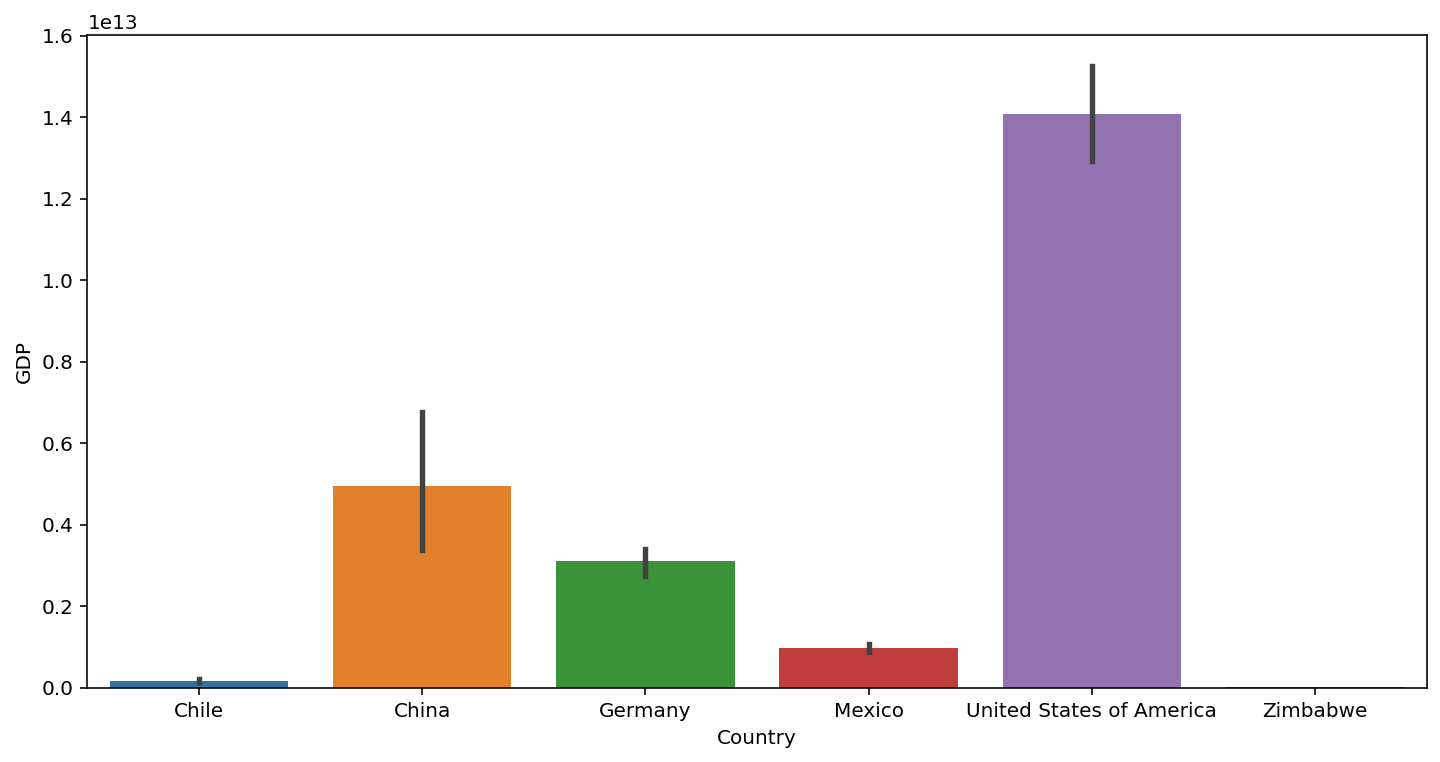

In [124]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=df, x='Country', y='GDP')

## Univariate Analysis

## Multivariate Analysis